# Classification Using Decision Tree
In this ptoject we will use sklearn library to create decition tree and predict test dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree


In [2]:
#read dataset by path and file's name
def read_dataset(path, name):
    df = pd.read_csv(path + name, header=None)
    return df

In [3]:
df = read_dataset("datasets/", "car.csv")

In [4]:
def mapToInt(df):
    mapedToInt = []
    df_copy = df.copy()
    for i in range(len(df.columns)):
        uniqeValues = df_copy.iloc[:,i].unique()
        map_to_int = {name: n for n, name in enumerate(uniqeValues)}
        df_copy.iloc[:,i] = df_copy.iloc[:,i].replace(map_to_int)
        mapedToInt.append(map_to_int)

    return df_copy, mapedToInt

In [7]:
def decisionTreeModel(df, len_start, len_end):
    df, mapedToInt = mapToInt(df)

    #seperating a part as test data
    shuffle = np.random.rand(len(df)) < 0.8
    df_train = df[shuffle]
    df_test = df[~shuffle]

    #seperating features and labels
    res = []

    for i in range(len_start, len_end + 1):
        X = df_train.iloc[:,0:len(df_train.columns)-1]
        y = df_train.iloc[:,len(df_train.columns)-1]
        
        #train
        decisionTree = DecisionTreeClassifier(max_depth=i)
        decisionTree.fit(X,y)


        X = df_test.iloc[:,0:len(df_test.columns)-1]
        y = df_test.iloc[:,len(df_test.columns)-1]
        #test
        y_predict = decisionTree.predict(X)

        confusionMatrix = confusion_matrix(y, y_predict)
        accuracy = accuracy_score(y, y_predict)

        truePredicted = 0
        all = 0
        for j in range(len(confusionMatrix)):
            all = all + sum(confusionMatrix[j])
            truePredicted = truePredicted + confusionMatrix[j,j]

        accuracy = truePredicted / all
        
        error = 1 - accuracy
        print("depth: " + str(i))
        print("All: " + str(all) + " ,true predicted: " + str(truePredicted) + " ,accuracy: " + str(accuracy) + " ,error:" + str(error))

        res.append([i, decisionTree, accuracy])
    
    best = max(res ,key=lambda item:item[2])
    print("best depth: " + str(best[0]) + " with accuracy: " + str(best[2]))

    #ploting
    plt.figure(figsize=(20,20))
    tree.plot_tree(best[1], fontsize=10)
    plt.show


depth: 2
All: 343 ,true predicted: 268 ,accuracy: 0.7813411078717201 ,error:0.21865889212827994
depth: 3
All: 343 ,true predicted: 268 ,accuracy: 0.7813411078717201 ,error:0.21865889212827994
depth: 4
All: 343 ,true predicted: 286 ,accuracy: 0.8338192419825073 ,error:0.16618075801749266
depth: 5
All: 343 ,true predicted: 298 ,accuracy: 0.8688046647230321 ,error:0.13119533527696792
best depth: 5 with accuracy: 0.8688046647230321


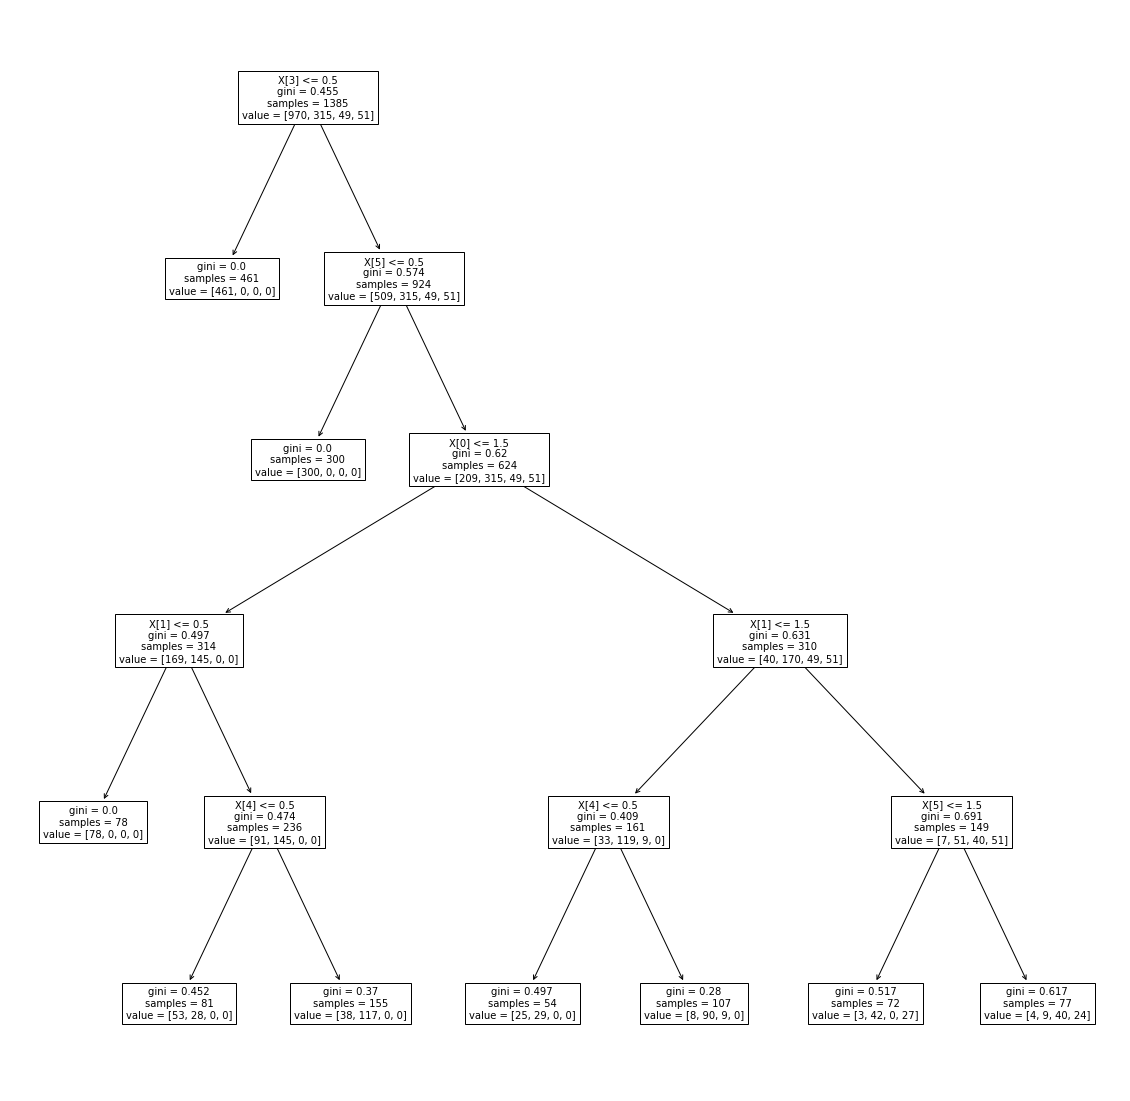

In [6]:
decisionTreeModel(df, 2, 5)